In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

In [2]:
clean_csv = os.path.join("data", "clean_data.csv")
data_df = pd.read_csv(clean_csv)
data_df.head()

,Unnamed: 0,General Health,(%) of Population Under FPL,Eaten Fruits or Veggies Yesterday,Age Group,Race,Education,Insured,Exercise,Sex,Drinker,Smoker
0,0,4.0,2.0,2.0,4.0,2,3.0,1.0,1.0,0,0.0,0.0
1,1,4.0,3.0,2.0,2.0,4,2.0,1.0,1.0,0,0.0,0.0
2,2,4.0,2.0,1.0,5.0,1,4.0,1.0,1.0,1,1.0,1.0
3,4,2.0,1.0,2.0,5.0,1,2.0,1.0,1.0,0,0.0,0.0
4,5,3.0,1.0,2.0,4.0,1,4.0,1.0,1.0,0,1.0,1.0


In [3]:
# Labels for numerical values
x_labels = {"General Health": {1: "Poor", 2 : "Fair", 3 : "Good", 4 : "Very Good", 5 : "Excellent"}}
education_labels = {"Education": {1 : "Less than HS", 2: "High school grad", 3: "Some College", 4: "College garduate", 5: "Don't know", 6: "Refused"}}
neighpov_labels = {"(%) of Population Under FPL": {1: "0 - <10% (low pov)", 2: "10 - <20%", 3: "20 - 30%", 4: "30 - <100% (very hi)"}}
race_labels = {"Race": {1:"White Non-Hispanic",2:"Black Non-Hispanic",3:"Hispanic",4:"Asian/PI Non-Hispanic",5:"Other Non-Hispanic"}}

In [4]:
# Labels for values
data_df["General Health"] = data_df["General Health"].map(lambda x:
                                                "1 Poor" if x == 1 else
                                                ("2 Fair" if x == 2 else
                                                 ("3 Good" if x == 3 else
                                                  ("4 Very Good" if x == 4 else
                                                   ( "5 Excellent")))))

data_df = data_df.sort_values('General Health',ascending=False)

data_df.head()

,Unnamed: 0,General Health,(%) of Population Under FPL,Eaten Fruits or Veggies Yesterday,Age Group,Race,Education,Insured,Exercise,Sex,Drinker,Smoker
3956,4245,5 Excellent,2.0,1.0,2.0,1,4.0,1.0,1.0,1,1.0,1.0
5728,6237,5 Excellent,1.0,2.0,4.0,1,4.0,1.0,1.0,1,1.0,1.0
1186,1260,5 Excellent,3.0,2.0,5.0,1,3.0,1.0,1.0,1,1.0,1.0
3819,4095,5 Excellent,3.0,3.0,4.0,2,4.0,1.0,1.0,0,0.0,0.0
3813,4089,5 Excellent,3.0,2.0,5.0,2,2.0,1.0,1.0,1,0.0,0.0


In [5]:
#Attach labels for plotting
plot_df = data_df.replace(x_labels, inplace=True)
plot_df = data_df.replace(education_labels, inplace=True)
plot_df = data_df.replace(neighpov_labels, inplace=True)
plot_df = data_df.replace(race_labels, inplace=True)

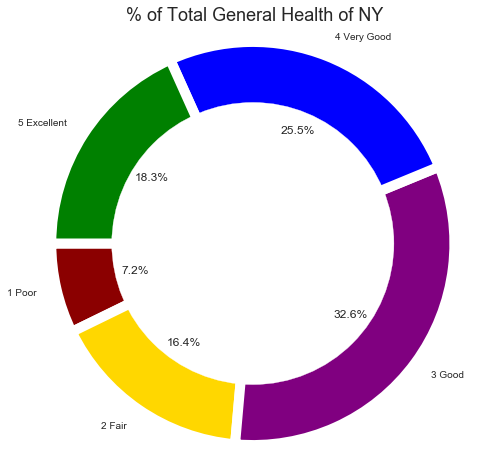

In [36]:
total_general_health = data_df.groupby(['General Health']).count()['Race']
total_general_health

#Assign colors
colors= ['darkred', 'gold', 'purple', 'blue', 'green']

total_race_chart = total_general_health.plot(kind='pie', figsize=(8,8), shadow=False, autopct="%1.1f%%", pctdistance=0.6, colors=colors, startangle=180, wedgeprops = {'linewidth': 10, 'edgecolor': 'white'})
total_race_chart.set_title("% of Total General Health of NY", fontsize=18)
plt.axis('equal')
plt.ylabel("")

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig("% of Total General Health")
plt.show()


## General Health by Race

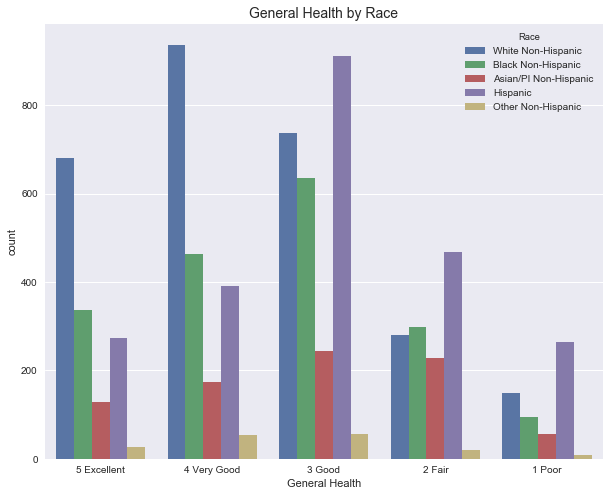

In [37]:
plt.figure(figsize=(10,8))
sns.set()
sns.countplot(x="General Health", hue="Race", data=data_df)
plt.title('General Health by Race', fontsize=14)

plt.savefig("General Health by Race")

## General Health by Environment

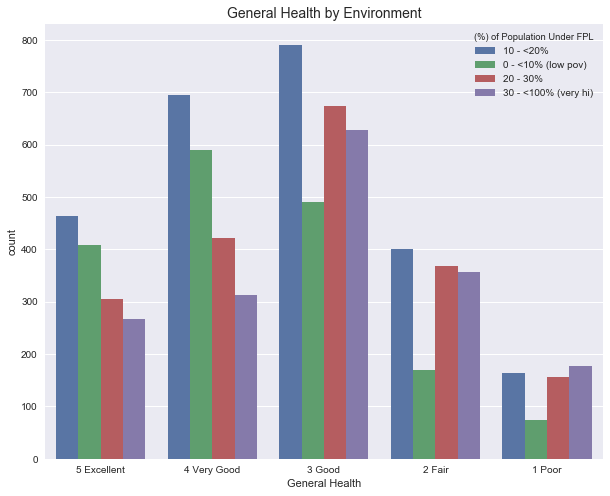

In [38]:
plt.figure(figsize=(10,8))
sns.set()
sns.countplot(x="General Health", hue="(%) of Population Under FPL", data=data_df)
plt.title('General Health by Environment',fontsize=14)

plt.savefig("General Health by Environment")

## General Health by Education

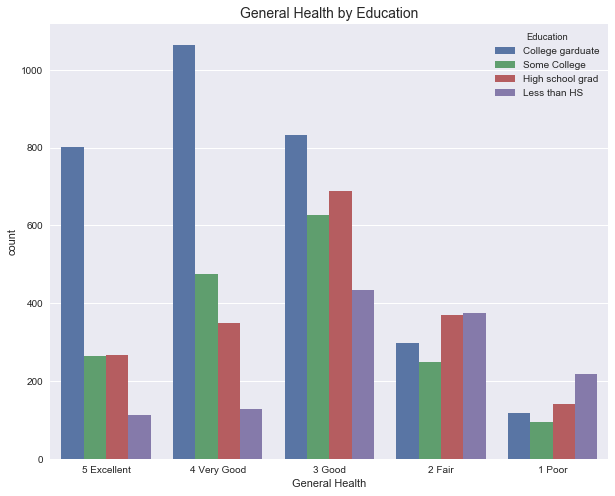

In [39]:
plt.figure(figsize=(10,8))
sns.set()
sns.countplot(x="General Health", hue="Education", data=data_df)
plt.title('General Health by Education', fontsize=14)

plt.savefig("General Health by Education")